In [37]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import os
import matplotlib.pyplot as plt 

In [38]:
path = '/Data_Scient/Intern/plotly/'

In [39]:
# Tất cả các file trong folder hiện tại 
os.listdir()

['plotly.ipynb',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [40]:
lst_file_csv = []
for i in os.listdir():
    if(i.endswith('.csv')):
        df_temp = pd.read_csv(path+i)
        lst_file_csv.append(df_temp)
        res = pd.concat(lst_file_csv)
df_final = res
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [42]:
df_final = df_final.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [43]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Covert data type

In [44]:
df_final['Quantity Ordered'].dtype

dtype('O')

In [45]:
row_517 = df_final.iloc[[517]]
row_517

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [46]:
df_final = df_final.drop(index=517)

In [47]:
df_final[df_final['Quantity Ordered'].str.contains('Quantity Ordered')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [48]:
df_final['Quantity Ordered'].value_counts()

1                   168541
2                    13324
3                     2919
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [49]:
df_2 = df_final[df_final['Quantity Ordered'] != 'Quantity Ordered']

In [50]:
df_2['Quantity Ordered'] = pd.to_numeric(df_2['Quantity Ordered'],downcast='integer')

In [51]:
df_2['Price Each'] = pd.to_numeric(df_2['Price Each'] , downcast='float')

In [52]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185938 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185938 non-null  object 
 1   Product           185938 non-null  object 
 2   Quantity Ordered  185938 non-null  int8   
 3   Price Each        185938 non-null  float32
 4   Order Date        185938 non-null  object 
 5   Purchase Address  185938 non-null  object 
dtypes: float32(1), int8(1), object(4)
memory usage: 8.0+ MB


In [53]:
df_2['Order Date'].value_counts()

12/15/19 20:16    8
12/11/19 13:24    7
10/30/19 21:28    7
04/02/19 13:24    7
10/11/19 19:44    6
                 ..
01/18/19 18:04    1
01/07/19 19:48    1
01/23/19 17:59    1
01/26/19 10:28    1
09/30/19 00:18    1
Name: Order Date, Length: 142388, dtype: int64

In [54]:
month = df_2['Order Date'].str.slice(0,2,1)
df_2['Month'] = month
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [55]:
sales = df_2['Quantity Ordered'] * df_2['Price Each']
df_2['Sales'] = sales
df_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.990000


# Vẽ biểu đồ với Plotly

In [56]:
import plotly.express as px

In [57]:
sales_by_month = df_2.groupby('Month').sum()['Sales']
sales_by_month

C:\Users\maidu\AppData\Local\Temp\ipykernel_4624\2251247965.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Month
01    1822252.875
02    2201642.500
03    2806950.500
04    3390658.250
05    3152591.750
06    2577102.250
07    2646075.750
08    2243767.750
09    2097260.000
10    3736715.000
11    3199591.750
12    4613428.500
Name: Sales, dtype: float32

In [58]:
df_sales_by_month = pd.DataFrame(sales_by_month)
df_sales_by_month.head()

,Sales
Month,
01,1822252.875
02,2201642.500
03,2806950.500
04,3390658.250
05,3152591.750


In [59]:
df_sales_by_month['Month'] = df_sales_by_month.index
df_sales_by_month

,Sales,Month
Month,,
01,1822252.875,01
02,2201642.500,02
03,2806950.500,03
04,3390658.250,04
05,3152591.750,05
06,2577102.250,06
07,2646075.750,07
08,2243767.750,08
09,2097260.000,09


In [60]:
x_sales = np.array(df_sales_by_month['Sales'])
y_sales = np.array(df_sales_by_month['Month'])

In [61]:
print(x_sales)

[1822252.9 2201642.5 2806950.5 3390658.2 3152591.8 2577102.2 2646075.8
 2243767.8 2097260.  3736715.  3199591.8 4613428.5]


In [62]:
print(y_sales)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


# Bar chart

In [63]:
fig = px.bar(df_sales_by_month , x=x_sales , y=y_sales)
fig.show()

# Scatter plot

In [64]:
fig = px.scatter(df_sales_by_month , title='Biểu đồ thể hiện doanh thu bán hàng theo tháng' , x='Sales' , y='Month' , color='Sales' , size='Sales')
fig.show()

# Pie Chart

In [65]:
fig = px.pie(df_sales_by_month , values = "Sales" , names="Month")
fig.show()

# Box - plot

In [66]:
fig = px.box(df_sales_by_month , x="Month" , y="Sales")
fig.show()

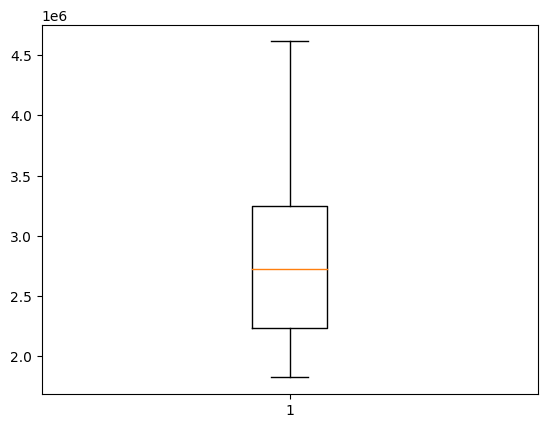

In [67]:
fig = plt.boxplot(x_sales)
plt.show()

# Biểu đồ thể hiện mức độ hoàn thiện công việc

In [68]:
import plotly.figure_factory as ff 
df = [dict(Task="A", Start='2020-01-01', Finish='2009-02-02'), 
    dict(Task="Job B", Start='2020-03-01', Finish='2020-11-11'), 
    dict(Task="Job C", Start='2020-08-06', Finish='2020-09-21')]

fig = ff.create_gantt(df)
fig.show()

# Table

In [75]:
import plotly.figure_factory as ff

df_table = [['Full Name' , 'Age' , 'Job' , 'Description'],
            ['Mai Đức Phúc' , '22' , 'Student' , 'Good boy'],
            ['Neymar Jr' , '31' , 'Player Football' , 'Magic']
        ]
fig = ff.create_table(df_table,height_constant=20)
fig.show()